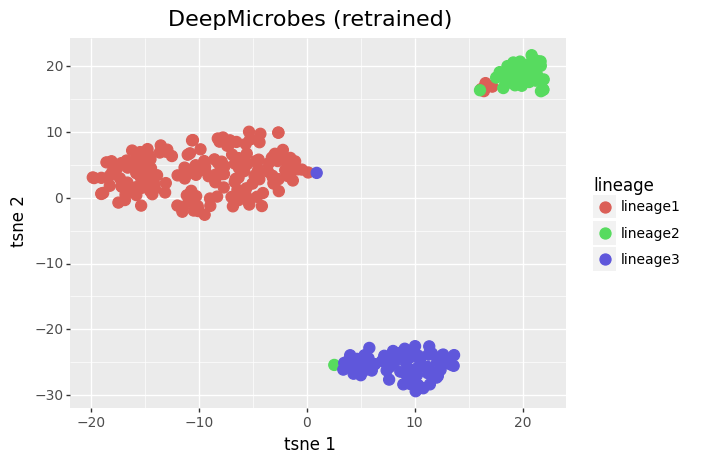

/data/users/CS18D017/miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 8 x 10 in image.
/data/users/CS18D017/miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: tsne_plot_Deep.png


In [398]:
import umap.umap_ as umap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from plotnine import ggplot, aes, geom_point, labs, theme, theme_bw
embed=np.load("../../../../../../invitro_reduced_tfrec/sub_lin_result/random_lineage_embed.npy")
tsne = TSNE(n_components=2, random_state=40)
embedding_2d = tsne.fit_transform(embed)

df=pd.DataFrame()
df["tsne_1"]=embedding_2d[:,0]
df["tsne_2"]=embedding_2d[:,1]
df["lineage"]=lineage[0]

plot = (
    ggplot(df) +
    aes(x='tsne_1', y='tsne_2', color='lineage') +  # Map 'lineage' to color
    geom_point(size=4) +  # Create scatter plot
    labs(title='DeepMicrobes (retrained)', x='tsne 1', y='tsne 2',size=12) +  # Titles and axis labels
       theme(
            plot_title=element_text(size=16),                  # Title font size
            axis_title_x=element_text(size=12),                # X-axis title font size
            axis_title_y=element_text(size=12),                # Y-axis title font size
            axis_text_x=element_text(size=10),                 # X-axis tick labels font size
            axis_text_y=element_text(size=10),                 # Y-axis tick labels font size
            legend_title=element_text(size=12),                # Legend title font size
            legend_text=element_text(size=10)                  # Legend labels font size
        ) 
)

# Display the plot
print(plot)
plot.save("tsne_plot_Deep.png", width=8, height=10, dpi=300)

In [20]:
from Bio import SeqIO
import pandas as pd
import subprocess
file_path = '../scripts/db/NC_000962.3.fasta'

# Reading the FASTA file
seq_record = list(SeqIO.parse(file_path, "fasta"))[0]
ref_fasta=''.join(list(seq_record.seq))

path="../simulation/simulation2/ref_tbprof/"
l_path=[path+"lineage1.fasta",path+"lineage2.fasta",path+"lineage3.fasta",path+"lineage4.fasta"]

/data/users/CS18D017/miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 8 x 10 in image.
/data/users/CS18D017/miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: tsne_plot_Demixer.png


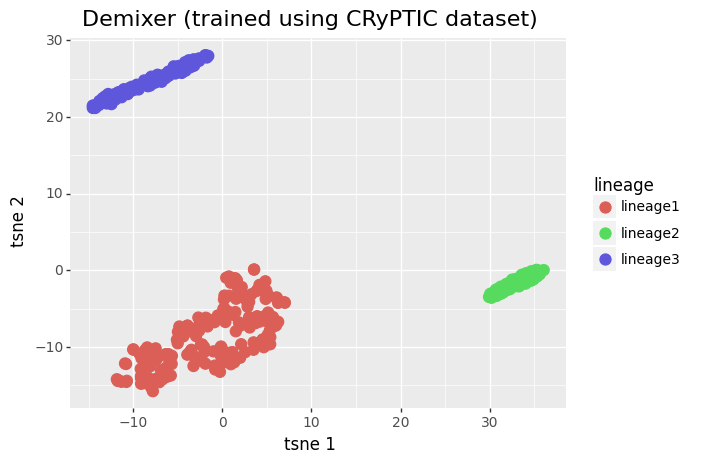

In [8]:
import pickle
filename = "../scripts/finaloutput/Cryptic_rerun/n_z_t0.dat"
fileobj = open(filename, mode='r')
n_z_t = np.fromfile(fileobj, dtype=np.uint32)
fileobj.close
n_z_t=n_z_t.reshape((71,148990))


with open('../scripts/finaloutput/Cryptic_rerun/Docs_col_name.pkl', 'rb') as f:
    Docs_col_name=pickle.load(f)
f.close();
cols_name=dict(zip(Docs_col_name,range(len(Docs_col_name))))

embed_Demixer=np.zeros((300,71))
j=0
for l in l_path:
        seq_record = list(SeqIO.parse(l, "fasta"))[0]
        l1_fasta=''.join(list(seq_record.seq))
        for i in range(0,len(l1_fasta)):
            if(l1_fasta[i]!=ref_fasta[i]):
                col_id=ref_fasta[i]+str(i+1)+l1_fasta[i]
                if(cols_name.get(col_id) is not None):
                    ind=cols_name.get(col_id)
                    embed_Demixer[j,:]=n_z_t[:,ind]
                    j=j+1
                    
tsne = TSNE(n_components=2, random_state=40)
embedding_2d = tsne.fit_transform(embed_Demixer)

df=pd.DataFrame()
df["tsne_1"]=embedding_2d[:,0]
df["tsne_2"]=embedding_2d[:,1]
df["lineage"]=lineage[0]

plot = (
    ggplot(df) +
    aes(x='tsne_1', y='tsne_2', color='lineage') +  # Map 'lineage' to color
    geom_point(size=4) +  # Create scatter plot
    labs(title='Demixer (trained using CRyPTIC dataset)', x='tsne 1', y='tsne 2') +  # Titles and axis labels
       theme(
            plot_title=element_text(size=16),                  # Title font size
            axis_title_x=element_text(size=12),                # X-axis title font size
            axis_title_y=element_text(size=12),                # Y-axis title font size
            axis_text_x=element_text(size=10),                 # X-axis tick labels font size
            axis_text_y=element_text(size=10),                 # Y-axis tick labels font size
            legend_title=element_text(size=12),                # Legend title font size
            legend_text=element_text(size=10)                  # Legend labels font size
        ) 
)

# Display the plot
plot.save("tsne_plot_Demixer.png", width=8, height=10, dpi=300)
print(plot)

(300, 768)


/data/users/CS18D017/miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 8 x 10 in image.
/data/users/CS18D017/miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: tsne_plot_DNABERT2.png


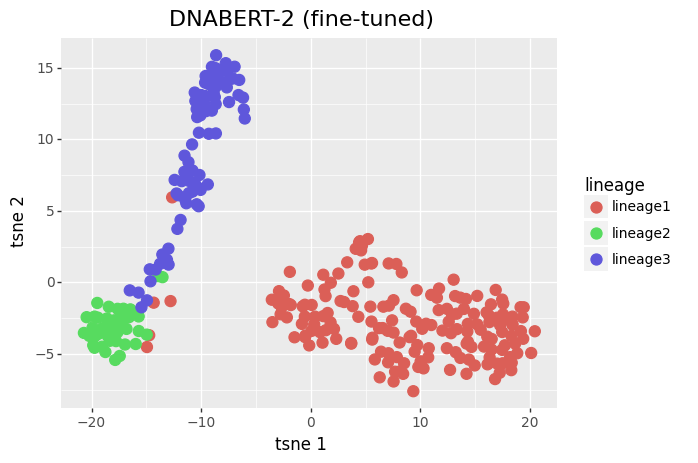

In [402]:
#DNABERT2_embeddings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE
from plotnine import ggplot, aes, geom_point, labs, theme, theme_bw,element_text
embed=np.load("../scripts/Deep_train/random_conslr_sqrt.npy")
print(embed.shape)
tsne = TSNE(n_components=2, random_state=40)
embedding_2d = tsne.fit_transform(embed)

lineage=pd.read_csv("../scripts/Deep_train/lineage.csv",header=None)

df=pd.DataFrame()
df["tsne_1"]=embedding_2d[:,0]
df["tsne_2"]=embedding_2d[:,1]
df["lineage"]=lineage[0]

plot = (
    ggplot(df) +
    aes(x='tsne_1', y='tsne_2', color='lineage') +  # Map 'lineage' to color
    geom_point(size=4) +  # Create scatter plot
    labs(title='DNABERT-2 (fine-tuned)', x='tsne 1', y='tsne 2') +  # Titles and axis labels
     theme(
            plot_title=element_text(size=16),                  # Title font size
            axis_title_x=element_text(size=12),                # X-axis title font size
            axis_title_y=element_text(size=12),                # Y-axis title font size
            axis_text_x=element_text(size=10),                 # X-axis tick labels font size
            axis_text_y=element_text(size=10),                 # Y-axis tick labels font size
            legend_title=element_text(size=12),                # Legend title font size
            legend_text=element_text(size=10)                  # Legend labels font size
        ) 
)

# Display the plot
plot.save("tsne_plot_DNABERT2.png", width=8, height=10, dpi=300)
print(plot)


In [405]:
gt=pd.read_csv("../scripts/db/invitro_Deep_groundtruth.csv")
gt_processed=np.argmax(gt.values, axis=1)

Demixer=pd.read_csv("../scripts/finaloutput/invitro_Deep/n_m_z0.txt",delimiter='\s+',header=None)
Demixer_array=np.zeros((48,4))
Demixer_array[:,0:3]=Demixer.iloc[:,0:3]
Demixer_array[:,3]=Demixer[3]+Demixer[4] #adding up 3 and 4 as they are assigned lienage 4.9 and 4.3.4.2.1
Demixer_processed=np.argmax(Demixer_array, axis=1)

In [406]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def cal_metrics(predicted,indices,class_type):
    for i in range(0,3):
        # Calculate the metrics
        metrics[0,i] = np.around(accuracy_score(ground_truth[indices], predicted[:,i][indices]),2)
        metrics[1,i] = np.around(precision_score(ground_truth[indices], predicted[:,i][indices], average=class_type, zero_division=0),2)
        metrics[2,i] = np.around(recall_score(ground_truth[indices], predicted[:,i][indices], average=class_type, zero_division=0),2)
        metrics[3,i] = np.around(f1_score(ground_truth[indices], predicted[:,i][indices], average=class_type, zero_division=0),2)
    return metrics

metrics=np.zeros((4,3))

predicted=np.zeros((len(gt_processed),3))
# Example ground truth and predicted 2D arrays
ground_truth = gt_processed
predicted[:,2] = Demixer_processed

DeepMicrobes=pd.read_csv("../scripts/db/Deepmicrobes_invitro.csv",header=None).values

DeepMicrobes_array=np.zeros((48,4))

DeepMicrobes_array[:,0:3]=DeepMicrobes[:,0:3]

max_values=DeepMicrobes_array.max(axis=1, keepdims=True)

DeepMicrobes_processed=np.where(max_values > 0.5, 
                  (DeepMicrobes_array == max_values).astype(int),  # Original behavior if max > 50%
                  np.array([0, 0, 0, 1]))
DeepMicrobes_processed=np.argmax(DeepMicrobes_processed, axis=1)        
predicted[:,0] = DeepMicrobes_processed

DBS=np.load("../scripts/Deep_train/DNABERT2_LR.npy")
max_values=DBS.max(axis=1, keepdims=True)

DBS_processed=np.where(max_values > 0.37, 
                  (DBS == max_values).astype(int),  # Original behavior if max > 50%
                  np.array([0, 0, 0, 1]))
DBS_processed=np.argmax(DBS_processed, axis=1) 

predicted[:,1] = DBS_processed


indices=np.where((gt_p[:, 0] == 1) | (gt_p[:, 1] == 1) | (gt_p[:, 2] == 1))[0]
print(cal_metrics(predicted,indices,'macro'))

indices=np.where(gt_p[:, 3] == 1)[0]
print(cal_metrics(predicted,indices,'micro'))

print(len(ground_truth[indices]), len(predicted[:,2][indices]))

indices=np.where((gt_p[:, 0] == 1) | (gt_p[:, 1] == 1) | (gt_p[:, 2] == 1) | (gt_p[:, 3] == 1))[0]
print(cal_metrics(predicted,indices,'macro'))



[[0.97 0.94 1.  ]
 [0.97 0.75 1.  ]
 [0.96 0.7  1.  ]
 [0.96 0.72 1.  ]]
[[0.88 0.94 0.94]
 [0.88 0.94 0.94]
 [0.88 0.94 0.94]
 [0.88 0.94 0.94]]
16 16
[[0.94 0.94 0.98]
 [0.93 0.94 0.97]
 [0.94 0.93 0.98]
 [0.93 0.94 0.98]]


/data/users/CS18D017/miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 10 x 3 in image.
/data/users/CS18D017/miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: Deep_comparison.png


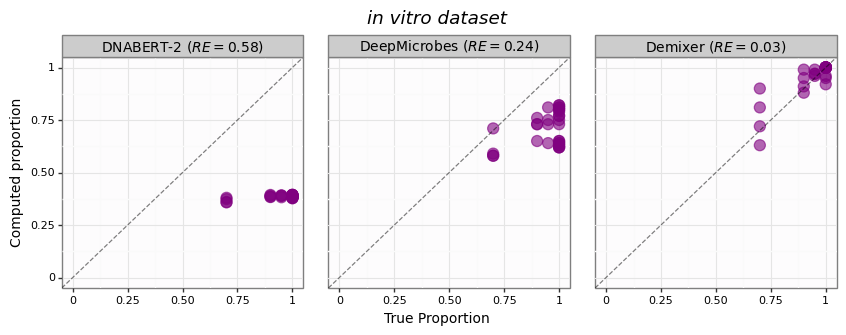

<ggplot: (8787034779510)>

In [394]:
import seaborn as sns;
import pandas as pd;
import matplotlib.pyplot as plt
from plotnine import *
import plotnine as p9
import math
import numpy as np

def rela_error(x,y):
            x=x;
            y=y;
            z=abs(x-y)/(x+0.01);
            return np.mean(z);

def deep_plot(indices):
    ground_truth=pd.read_csv('invitro/invitro_groundtruth_Deep.csv')
    computed_prop1=pd.DataFrame();
    computed_prop1['True Proportion']=ground_truth['major'][indices]
    computed_prop1['Computed proportion']=np.max(DeepMicrobes,axis=1)[indices]
    er=rela_error(computed_prop1['True Proportion'],computed_prop1['Computed proportion'])
    computed_prop1['Method']=['DeepMicrobes ($RE ='+str(np.around(er,2))+'$)'] *len(ground_truth['major'][indices])
    
    computed_prop2=pd.DataFrame();
    computed_prop2['True Proportion']=ground_truth['major'][indices]
    computed_prop2['Computed proportion']=np.max(DBS,axis=1)[indices]
    er=rela_error(computed_prop2['True Proportion'],computed_prop2['Computed proportion'])
    computed_prop2['Method']=['DNABERT-2 ($RE = '+str(np.around(er,2))+'$)'] *len(ground_truth['major'][indices])
    
    
    computed_prop3=pd.DataFrame();
    computed_prop3['True Proportion']=ground_truth['major'][indices]
    computed_prop3['Computed proportion']=np.max(Demixer,axis=1)[indices]
    er=rela_error(computed_prop3['True Proportion'],computed_prop3['Computed proportion'])
    computed_prop3['Method']=['Demixer ($RE = '+str(np.around(er,2))+'$)'] *len(ground_truth['major'][indices])
    frames = [computed_prop1, computed_prop2,computed_prop3]
    computed_prop=pd.concat(frames)
    
    g=ggplot(computed_prop,aes(x='True Proportion',y='Computed proportion'))+ggtitle('in vitro dataset')+\
    geom_point(size=4,color="purple",alpha=0.6)+\
    geom_abline(slope=1, intercept=0, linetype='dashed', color='black',alpha=0.5)+\
    facet_wrap('~Method')+p9.theme_bw()+\
    p9.theme(figure_size=(10,3))+\
    p9.xlim(0,1)+\
    p9.ylim(0,1)+\
    p9.theme(axis_text_x = element_text(size = 8,color='black'),axis_text_y = element_text(size = 8,color='black'),axis_title_y = element_text(size = 10),axis_title_x = element_text(size = 10),legend_text = element_text(size = 8),legend_title = element_text(size = 10))+\
    p9.themes.theme(legend_key_width=1, legend_key_height=1) +\
    p9.theme(strip_text = element_text(color = "black",size=10))+\
    p9.theme(panel_background=element_rect(fill='purple', alpha=0.01),panel_spacing=.25,)+\
    p9.theme(plot_title=element_text(face='italic'))
    
    ggsave(g,"Deep_comparison.png",dpi=300)
    
    return g
indices=np.where((gt_p[:, 0] == 1) | (gt_p[:, 1] == 1) | (gt_p[:, 2] == 1))[0]
deep_plot(indices)